In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import requests
import random 
from PIL import Image
import cv2

In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#print(X_train.shape,'\n',X_test.shape)

In [5]:
assert(X_train.shape[0] == y_train.shape[0]),'the number image is notequal to the number of image'
assert(X_test.shape[0] == y_test.shape[0]),'the number image is notequal to the number of image'
assert(X_test.shape[1:] == (28,28)),'the dimensions of the images are not 28 * 28'
assert(X_train.shape[1:] == (28,28)),'the dimensions of the images are not 28 * 28'

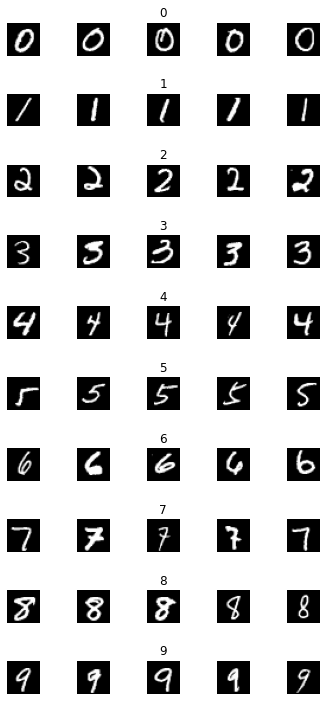

In [6]:
num_of_samples= []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows= num_classes, ncols= cols, figsize = (5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:], cmap= plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of image')

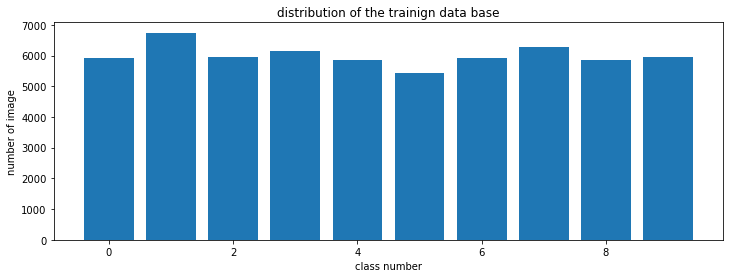

In [7]:
print(num_of_samples)

plt.figure(figsize= (12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title('distribution of the trainign data base')
plt.xlabel('class number')
plt.ylabel('number of image')

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixles = 784   #28 × 28
X_train = X_train.reshape(X_train.shape[0], num_pixles)
X_test = X_test.reshape(X_test.shape[0], num_pixles)

In [11]:
def create_model():
    model = Sequential()
    model.add(Dense(1000, input_dim= num_pixles, activation= 'relu'))  #norons default 10
    model.add(Dense(1000, activation= 'relu'))
    model.add(Dense(num_classes, activation= 'softmax'))
    model.compile(Adam(lr= 0.01), loss= 'categorical_crossentropy', metrics=['accuracy'])
    return model

اگر در کد بالا تعداد نورون هارو به جای 10 تا میذاشتیم تعداد پیکسل که 784 تاست
Total params: 1,238,730
که این مدل بسیار سنگین است، برای تقویت بیشتر اکیوریسی یا همان دقت این یکی از راه هایش است

ولی باید حواسمان باشد اور فیتینگ نشه
نتیجه ی بالا بردن تعداد نورون  -> 
Epoch 10/10
270/270    3s 11ms/step - loss: 0.0642 - accuracy: 0.9832 - val_loss: 0.1274 - val_accuracy: 0.9732


In [12]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split= 0.1, epochs= 200, batch_size= 200,verbose=1 ,shuffle=1) #epock default 15

Epoch 1/200
270/270 [==============================] - 6s 19ms/step - loss: 1.0488 - accuracy: 0.8158 - val_loss: 0.1171 - val_accuracy: 0.9667
Epoch 2/200
270/270 [==============================] - 4s 16ms/step - loss: 0.1350 - accuracy: 0.9611 - val_loss: 0.1114 - val_accuracy: 0.9680
Epoch 3/200
270/270 [==============================] - 4s 16ms/step - loss: 0.1036 - accuracy: 0.9700 - val_loss: 0.1350 - val_accuracy: 0.9657
Epoch 4/200
270/270 [==============================] - 4s 16ms/step - loss: 0.0969 - accuracy: 0.9706 - val_loss: 0.1511 - val_accuracy: 0.9637
Epoch 5/200
270/270 [==============================] - 4s 16ms/step - loss: 0.0814 - accuracy: 0.9763 - val_loss: 0.1189 - val_accuracy: 0.9692
Epoch 6/200
270/270 [==============================] - 4s 16ms/step - loss: 0.0805 - accuracy: 0.9749 - val_loss: 0.1319 - val_accuracy: 0.9678
Epoch 7/200
270/270 [==============================] - 4s 16ms/step - loss: 0.0762 - accuracy: 0.9783 - val_loss: 0.1025 - val_accuracy:

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')


In [ ]:
res = requests.get('https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png', stream= True)
img = Image.open(res.raw)
# plt.imshow(img)

#آماده کردن عکس برای شبکه عصبی که باید 28 در 28 باشد با پس زمینه سیاه
img_array = np.array(img)
#img_array.shape  #-> (850, 850, 4)    must be 28×28
img = cv2.resize(img_array, (28,28))
# print(img.shape) #-> (28, 28, 4)      must be 28×28×1
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# print(img.shape) #-> (28, 28)
##plt.imshow(img, cmap= plt.get_cmap('gray'))
#تصویر ما پس زمینه سفید و متن سیاه دارد ولی تصویر شبکه عصبی برعکس اینه
img = cv2.bitwise_not(img)
plt.imshow(img, cmap= plt.get_cmap('gray')) #Great

img = img/255    #-> normalize to 0 and 1
img = img.reshape(1,784)

In [ ]:
res = requests.get('https://s17.picofile.com/file/8424567442/jcaptcha.jpg', stream= True)
img = Image.open(res.raw)
# plt.imshow(img)

#آماده کردن عکس برای شبکه عصبی که باید 28 در 28 باشد با پس زمینه سیاه
img_array = np.array(img)
#img_array.shape  #-> (850, 850, 4)    must be 28×28
img = cv2.resize(img_array, (28,28))
# print(img.shape) #-> (28, 28, 4)      must be 28×28×1
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# print(img.shape) #-> (28, 28)
##plt.imshow(img, cmap= plt.get_cmap('gray'))
#تصویر ما پس زمینه سفید و متن سیاه دارد ولی تصویر شبکه عصبی برعکس اینه
img = cv2.bitwise_not(img)
plt.imshow(img, cmap= plt.get_cmap('gray')) #Great

img = img/255    #-> normalize to 0 and 1
img = img.reshape(1,784)

In [ ]:
prediction= model.predict_classes(img)
print('predicted_digit : ', str(prediction))